## 导入代码库

In [15]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

In [16]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

## 加载封装好的模型

In [17]:
MODEL_NAME = 'fish_inference_graph'
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'

detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='') 

## 加载标签映射文件，label_map中文叫做标签映射

In [18]:
NUM_CLASSES = 2
PATH_TO_LABELS = 'training/my_label_map.pbtxt'
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

## 图片数据转换为numpy的ndarray对象

In [19]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

## 从文件夹中随机选10张图片

In [20]:
import random
dir_path = 'n01440764'
imageName_list = os.listdir(dir_path)
imagePath_list = [os.path.join(dir_path, imageName) for imageName in imageName_list]
selected_imagePath_list = random.sample(imagePath_list, 10)
selected_imagePath_list

['n01440764\\n01440764_11602.JPEG',
 'n01440764\\n01440764_13275.JPEG',
 'n01440764\\n01440764_7647.JPEG',
 'n01440764\\n01440764_7876.JPEG',
 'n01440764\\n01440764_8246.JPEG',
 'n01440764\\n01440764_13116.JPEG',
 'n01440764\\n01440764_4512.JPEG',
 'n01440764\\n01440764_13956.JPEG',
 'n01440764\\n01440764_13489.JPEG',
 'n01440764\\n01440764_10779.JPEG']

## 用10张图片测试模型的目标检测效果

INFO:tensorflow:Restoring parameters from ./fish_inference_graph/model.ckpt


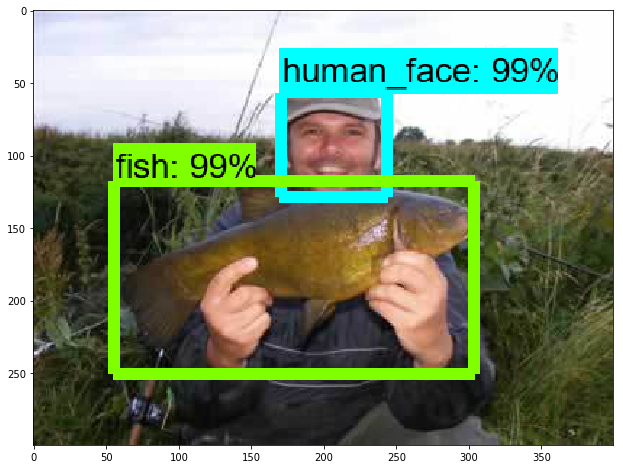

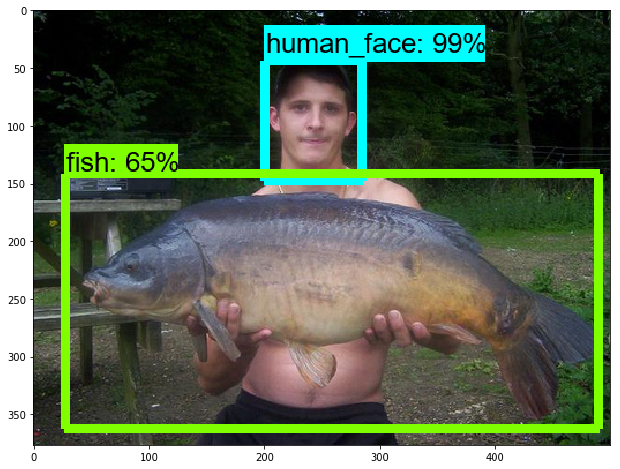

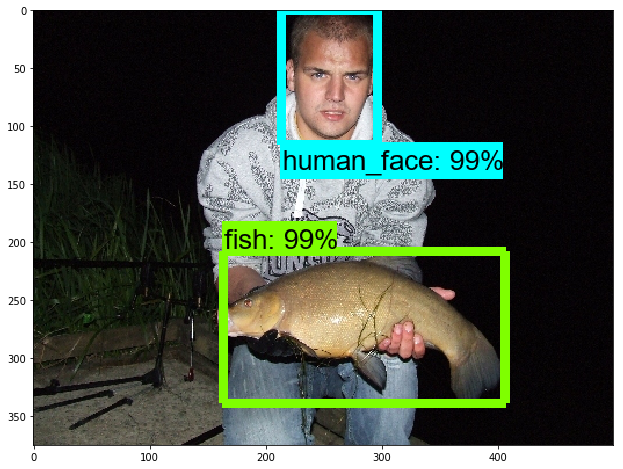

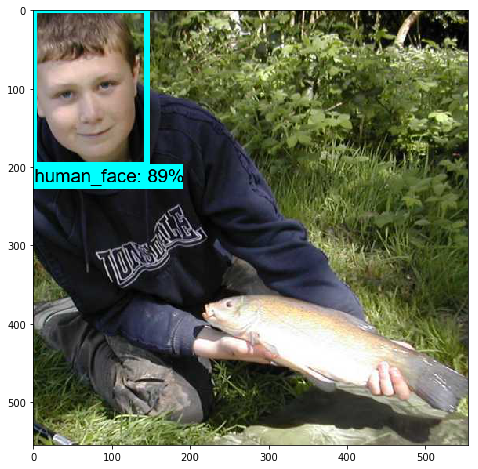

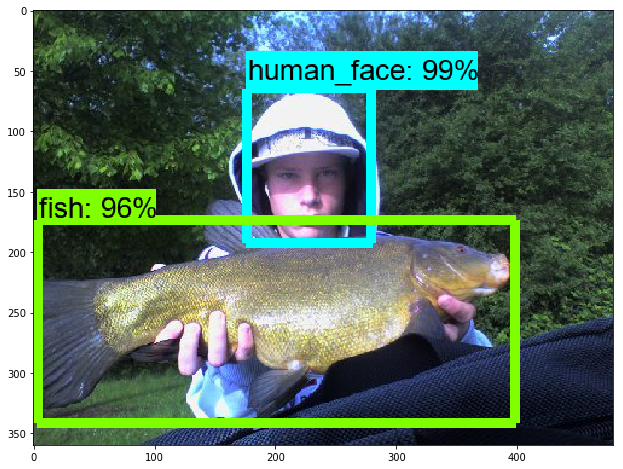

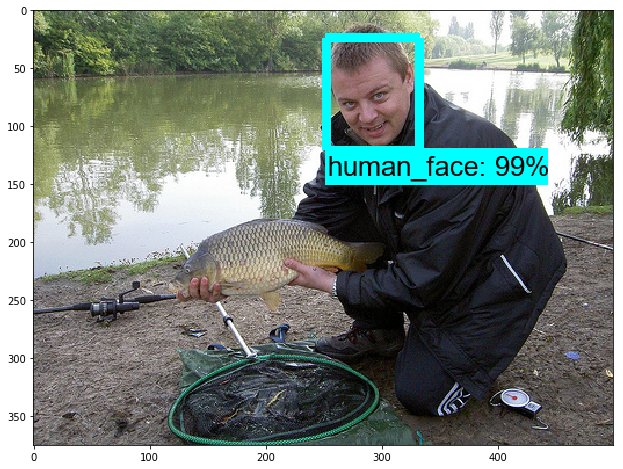

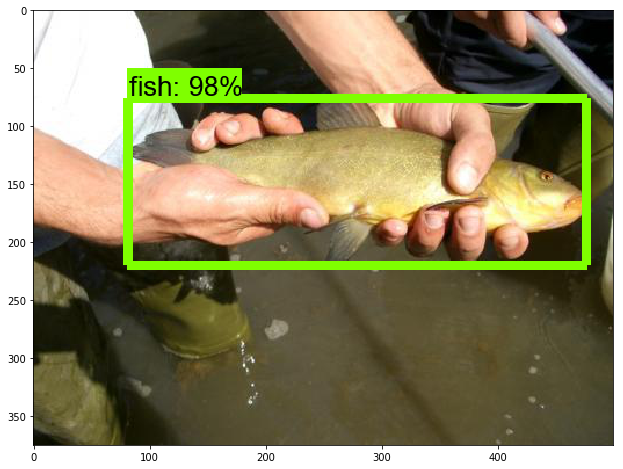

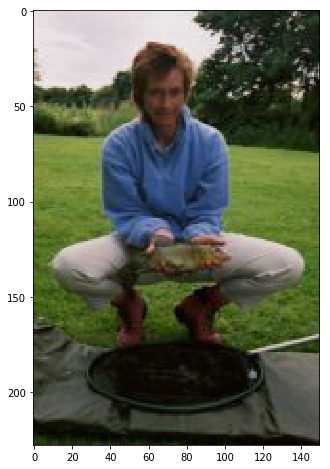

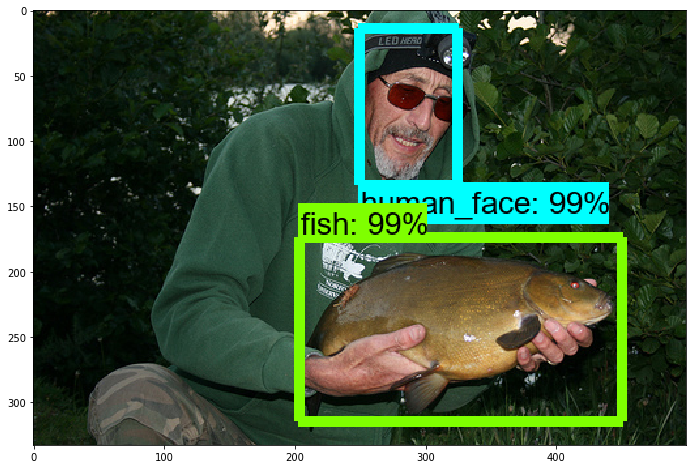

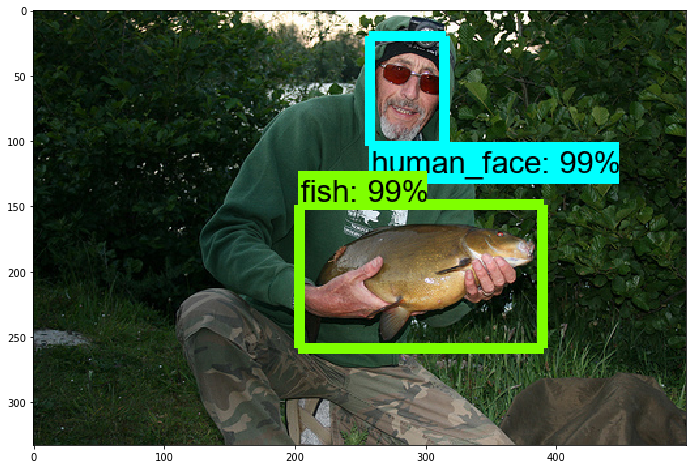

In [21]:
import tensorflow as tf
model_path = "./fish_inference_graph/model.ckpt"
detection_graph = tf.Graph()
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        #Load the graph with the trained states
        loader = tf.train.import_meta_graph(model_path+'.meta')
        loader.restore(sess, model_path)
        
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for imagePath in selected_imagePath_list:
            image = Image.open(imagePath)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            # Actual detection.
            (boxes, scores, classes, num) = sess.run(
              [detection_boxes, detection_scores, detection_classes, num_detections],
              feed_dict={image_tensor: image_np_expanded})
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
              image_np,
              np.squeeze(boxes),
              np.squeeze(classes).astype(np.int32),
              np.squeeze(scores),
              category_index,
              use_normalized_coordinates=True,
              line_thickness=8)
            plt.figure(figsize=(12,8))
            plt.imshow(image_np)
plt.show()